### Linear  Regression with Bayes Rule

### A Fun Application of Bayes' Rule to Economics

We now consider an application of Bayes' Rule to economics and econometrics.

Suppose we have two variables X,Y who are jointly standard normally distributed.

That is $(X,Y) \sim \mathcal{N}(\mu,\Sigma)$. Let's plot this using the formula for a multivariate normal: 

$$f(\vec x=(x,y)) = \frac{\exp([\vec x-\mu]^T\Sigma^{-1}[\vec x-\mu])}{ \sqrt{(2\pi)^2\left|{\Sigma}\right|}}$$

In [37]:
%matplotlib inline
from numba import jit
import matplotlib.pyplot as plt
import thinkbayes2 as tb
import thinkstats2 as ts
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn')
from scipy.stats import multivariate_normal

#generates grid and multivariate normal
μ=np.array([0,0])
Σ=np.array([[16,0],[0,8]])
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y =np.meshgrid(x,y) #generates grid
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
f=multivariate_normal(μ,Σ)

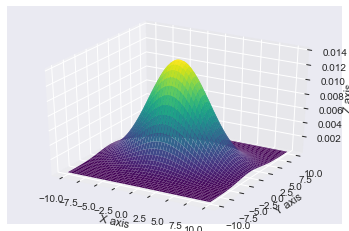

In [38]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

Now we consider the conditional probability distribution $f(Y|X)$. For a multivariate normal this is: 

$$Y\mid X=x\ \sim \ {\mathcal {N}}\left(\mu _y+{\frac {\sigma _y}{\sigma _x}}\rho (x-\mu _x),\,(1-\rho ^{2})\sigma _y^{2}\right)$$

where  $$\Sigma =\begin{pmatrix} \sigma^2_x & \rho \sigma_x \sigma_y \\ \rho \sigma_y \sigma_x & \sigma^2_y  \end{pmatrix} $$

So we get: 

$$f(Y=y|X=x) = \frac{1}{\sqrt{2\pi (1-\rho ^{2})\sigma^2_y}}e^{-\frac{(y-(\mu _y+{\frac {\sigma _y}{\sigma _x}}\rho (x-\mu _x)))^2}{2\sqrt{(1-\rho ^{2})\sigma _y^{2}}}}$$

This seems incredibly messy. However, let's focus on the mean of this function. This should seem familiar. It turns out the conditional expectation here is just a linear regression!


Furthermore, it turns out we can view this as the posterior generated by bayes' law.

Normals are conjugate to normals. Therefore, if we have a normal prior (our joint distribution) and a normal likelihood we get a normal posterior.


In this case, we can view the joint distribution as a prior on our observation, and the conditional here as a posterior. 


What we are doing is regressing what you don't know on what you know and this can be interpreted as Bayes' law.

This process of applying bayes' rule is the first step of an iterative process widely used in economics called the Kalman filter.